In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
from sklearn import tree
import cv2
import pickle
from skimage.transform import resize
# from cv2 import resize
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist

In [2]:
# category index

categories = {"0", "1", "2", "3", "4", "5", "6", "7", "8", "9",
              "=", "(", ")",
              "forall", "exists",
              "int", "log",
              "X", "y", 'z',
              "+", "-", "pi"}

category_index = {
    "0" : 0, "1" : 1, "2" : 2, "3" : 3, "4" : 4, "5" : 5, "6" : 6, "7" : 7, "8" : 8, "9" : 9,
    "=" : 10, "(" : 11, ")" : 12, "forall" : 13, "exists" : 14,
    "int" : 15, "log" : 16,
    "X" : 17, "y" : 18, "z" : 19, "+" : 20, "-" : 21, "pi" : 22
}

reverse_category_index = {v : k for k, v in category_index.items()}

In [6]:
X_test = np.loadtxt(f"X_test_add")
y_test = np.loadtxt(f"y_test_add")

_, X_test_reduced, _, y_test_reduced = train_test_split(X_test, y_test, test_size=0.2)
print(X_test_reduced.shape)

(29288, 2025)


In [7]:
(_, _),(x_test_kera, y_test_kera) = mnist.load_data()

print(x_test_kera.shape)

(10000, 28, 28)


In [82]:
# see what x_train_kera looks like
# print(y_test_kera[0])
# plt.imshow(x_test_kera[0], cmap=plt.cm.binary)
# plt.show()

# resize the image to 45x45
# see what the resized image looks like
# plt.imshow(kera_resized, cmap=plt.cm.binary)
# plt.show()

kera_resized = resize(x_test_kera, (x_test_kera.shape[0], 45, 45)) * 255

# sharpen the image
kera_sharpen = 1 - np.where(kera_resized< 170, 0.0, 255.0)

In [86]:
# keras flatten
kera_flatten = kera_sharpen.reshape(kera_sharpen.shape[0], 45*45)


In [88]:
X_test = np.concatenate((X_test_reduced, kera_flatten))
y_test = np.concatenate((y_test_reduced, y_test_kera))

print(X_test.shape)

(39288, 2025)


In [89]:
# save new dataset

np.savetxt(f"X_test_diverse", X_test)
np.savetxt(f"y_test_diverse", y_test)

In [90]:
dt_classifier = tree.DecisionTreeClassifier(max_depth=30)
dt_classifier.fit(X_test, y_test)

DecisionTreeClassifier(max_depth=30)

In [91]:
filename = 'decision_tree_v2.sav'
pickle.dump(dt_classifier, open(filename, 'wb'))

In [92]:
predicted = dt_classifier.predict(X_test_reduced)
accuracy = (len(X_test_reduced[predicted == y_test_reduced]) / len(X_test_reduced)) * 100
print("accuracy: ", accuracy)

accuracy:  95.89934444140945


In [3]:
# save new dataset

X_test = np.loadtxt(f"X_test_diverse")
y_test = np.loadtxt(f"y_test_diverse")

# split

X_train, X_test, y_train, y_test = train_test_split(X_test, y_test, test_size=0.2)

In [4]:
from sklearn.svm import SVC

svc_model = SVC(gamma=0.1)
svc_model.fit(X_test, y_test)

predicted = svc_model.predict(X_test)

accuracy = (len(X_test[predicted == y_test]) / len(X_test)) * 100
print("accuracy: ", accuracy)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


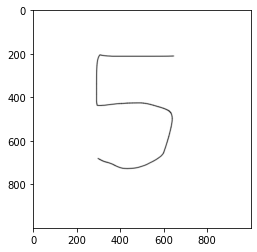

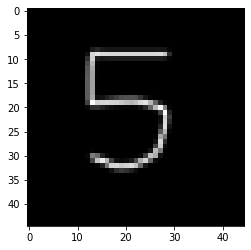

[[255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 ...
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]]
[1.]
1


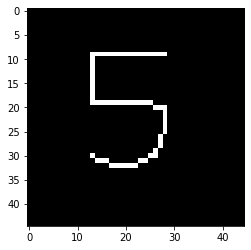

In [93]:
filepath = "/Users/maxko/Documents/D. Personal Project/Summer2023/neuralnet/scribbletex-4.png"
img = cv2.imread(filepath)[:,:,0]

print(img)

plt.imshow(1 - img, cmap=plt.cm.binary)
plt.show()

resized = resize(img, (45, 45)) * 255

plt.imshow(resized, cmap=plt.cm.binary)
plt.show()

print(resized)

sharpened = np.where(resized > 250, 255.0, 0.0)

flattened = resized.reshape(1, 2025)

predict = dt_classifier.predict(flattened)

print(predict)
print(reverse_category_index[predict[0]])

#plot image
plt.imshow(sharpened, cmap=plt.cm.binary)
plt.show()
